In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings #avoid warning flash
warnings.filterwarnings('ignore')
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score, classification_report

/tmp/ipykernel_13635/2252245981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


2024-03-28 23:09:30.646129: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 23:09:31.202126: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 23:09:31.202314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 23:09:31.275960: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 23:09:31.423424: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 23:09:33.764625: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

## data load

In [3]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('Shape of Diabetes dataset is :',dataframe.shape)
print('Size of Diabetes dataset is  :',dataframe.size)

Shape of Diabetes dataset is : (768, 9)
Size of Diabetes dataset is  : 6912


In [5]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Drop if there are duplicates rows.
dataframe = dataframe.drop_duplicates()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## pre processing

In [8]:
# show how many columns has 0 values and sum it

featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


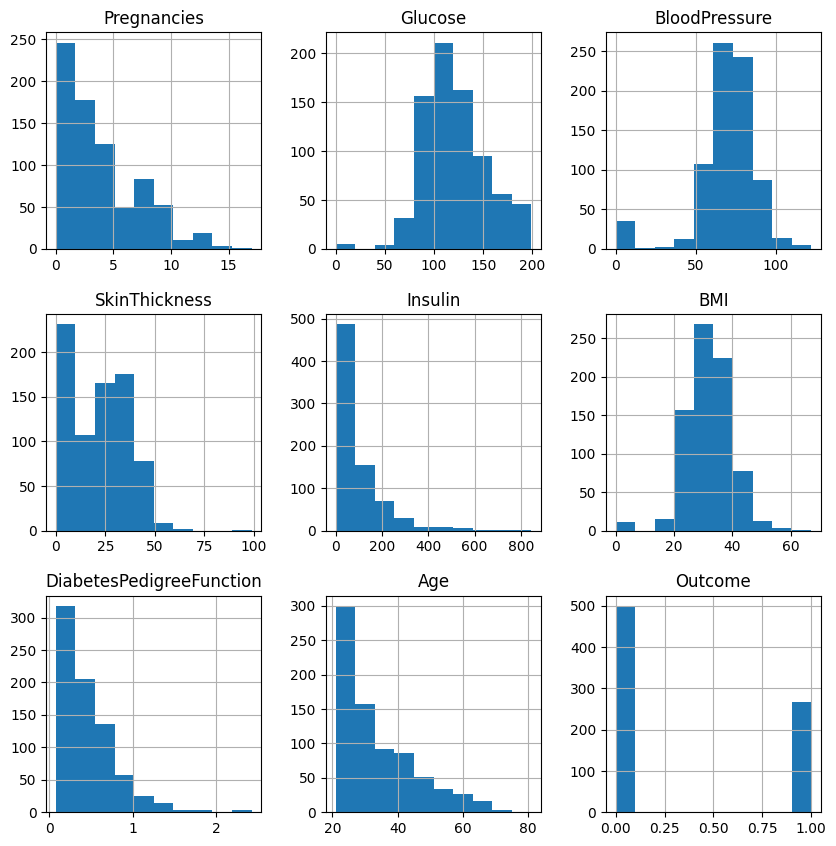

In [9]:
# Analyze feature distributions
features = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age',	'Outcome']


dataframe.hist(figsize=(10, 10))
# plt.xlabel("Feature")
# plt.ylabel("Frequency")
# plt.title("Distribution of Features in Pima Indians Diabetes Dataset")
plt.subplots_adjust(bottom=0.1)  # Adjust space for readability
plt.show()

In [10]:
# Replacing 0 values with mean or median of that column
dataframe['Glucose']=dataframe['Glucose'].replace(0,dataframe['Glucose'].mean())#normal distribution
dataframe['BloodPressure']=dataframe['BloodPressure'].replace(0,dataframe['BloodPressure'].mean())#normal distribution
dataframe['SkinThickness']=dataframe['SkinThickness'].replace(0,dataframe['SkinThickness'].median())#skewed distribution
dataframe['Insulin']=dataframe['Insulin'].replace(0,dataframe['Insulin'].median())#skewed distribution
dataframe['BMI']=dataframe['BMI'].replace(0,dataframe['BMI'].mean())#normal distribution

In [11]:
# Now verify whether there are any 0 values
featureList = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
print(dataframe[featureList].isin({0}).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [12]:
# replacing the value 0 and 1 in column name Outcome for readability
dataframe["Outcome"].replace(0,"Non-Diabetic",inplace=True) 
dataframe["Outcome"].replace(1,"Diabetic",inplace=True)
dataframe["Outcome"]

0          Diabetic
1      Non-Diabetic
2          Diabetic
3      Non-Diabetic
4          Diabetic
           ...     
763    Non-Diabetic
764    Non-Diabetic
765    Non-Diabetic
766        Diabetic
767    Non-Diabetic
Name: Outcome, Length: 768, dtype: object

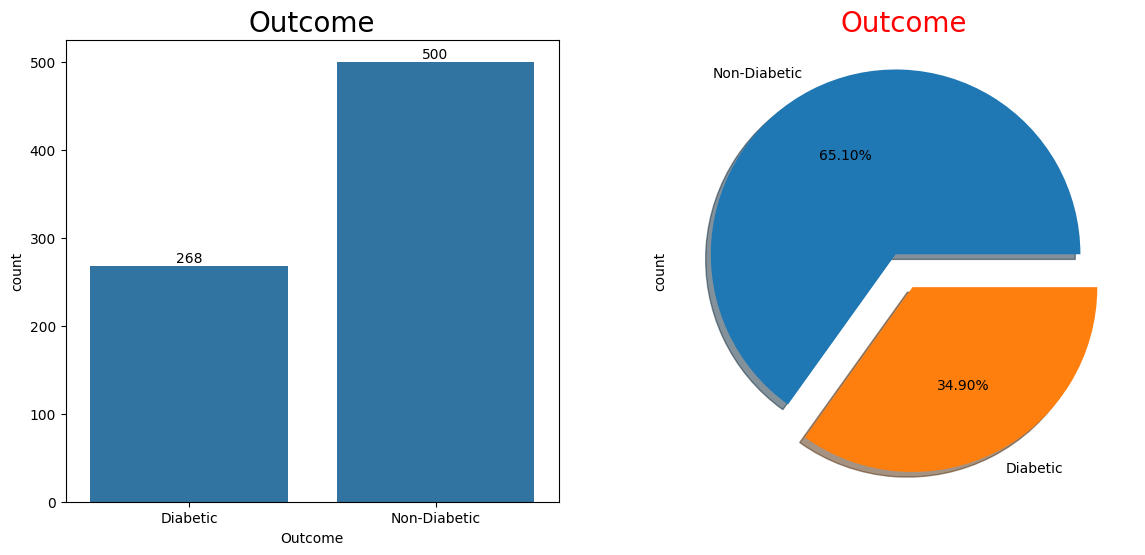

In [13]:
# plot the no of patients 
plt.figure(figsize=(14,6))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Outcome', data=dataframe)
ax.bar_label(ax.containers[0])
plt.title("Outcome", fontsize=20)

ax =plt.subplot(1,2,2)
ax=dataframe['Outcome'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Outcome", fontsize = 20,color='Red');

In [14]:
# for my analysis purpose i am saving the diabetic and non-diabetic data in different variables.
Diabetic = dataframe[dataframe["Outcome"]=="Diabetic"]
Non_diabetic = dataframe[dataframe["Outcome"]=="Non-Diabetic"]
Diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,Diabetic
2,8,183.0,64.0,23,30.5,23.3,0.672,32,Diabetic
4,0,137.0,40.0,35,168.0,43.1,2.288,33,Diabetic
6,3,78.0,50.0,32,88.0,31.0,0.248,26,Diabetic
8,2,197.0,70.0,45,543.0,30.5,0.158,53,Diabetic


In [15]:
Diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,142.159661,74.950326,29.716418,116.041045,35.381288,0.550500,37.067164
std,3.741239,29.545943,12.016572,9.676886,127.689084,6.596733,0.372354,10.968254
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000
25%,1.750000,119.000000,68.000000,23.000000,30.500000,30.900000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,30.500000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


In [16]:
x1=len(dataframe[dataframe["Glucose"]<=140])
x2=len(dataframe[(dataframe["Glucose"]>140)&(dataframe["Glucose"]<=199)])
x3=len(dataframe[dataframe["Glucose"]>=200])
print("patient count having normal Blood sugar :",x1)
print("patient count having prediabetes :",x2)
print("patient count having abnormal glucose :",x3)

patient count having normal Blood sugar : 576
patient count having prediabetes : 192
patient count having abnormal glucose : 0


In [17]:
### saving the patient details whose Glucose level is normal and are diabetic in a dataframe.
a=dataframe[(dataframe["Glucose"]<=140)&(dataframe["Outcome"]=="Diabetic")]
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.000000,35,168.0,43.100000,2.288,33,Diabetic
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,Diabetic
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,Diabetic
15,7,100.0,69.105469,23,30.5,30.000000,0.484,32,Diabetic
16,0,118.0,84.000000,47,230.0,45.800000,0.551,31,Diabetic
...,...,...,...,...,...,...,...,...,...
743,9,140.0,94.000000,23,30.5,32.700000,0.734,45,Diabetic
750,4,136.0,70.000000,23,30.5,31.200000,1.182,22,Diabetic
755,1,128.0,88.000000,39,110.0,36.500000,1.057,37,Diabetic
757,0,123.0,72.000000,23,30.5,36.300000,0.258,52,Diabetic


In [18]:
z=dataframe[(dataframe["Age"]>=35) & (dataframe["BMI"]>=30)& (dataframe["Outcome"]=="Diabetic")]
z


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.600000,0.627,50,Diabetic
8,2,197.0,70.0,45,543.0,30.500000,0.158,53,Diabetic
9,8,125.0,96.0,23,30.5,31.992578,0.232,54,Diabetic
13,1,189.0,60.0,23,846.0,30.100000,0.398,59,Diabetic
22,7,196.0,90.0,23,30.5,39.800000,0.451,41,Diabetic
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39,110.0,36.500000,1.057,37,Diabetic
757,0,123.0,72.0,23,30.5,36.300000,0.258,52,Diabetic
759,6,190.0,92.0,23,30.5,35.500000,0.278,66,Diabetic
761,9,170.0,74.0,31,30.5,44.000000,0.403,43,Diabetic


In [19]:
z[z["Pregnancies"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
66,0,109.0,88.0,30,30.5,32.5,0.855,38,Diabetic
440,0,189.0,104.0,25,30.5,34.3,0.435,41,Diabetic
506,0,180.0,90.0,26,90.0,36.5,0.314,35,Diabetic
757,0,123.0,72.0,23,30.5,36.3,0.258,52,Diabetic


In [20]:
dataframe = dataframe.replace({'Outcome': {'Non-Diabetic': 0, 'Diabetic': 1}})
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


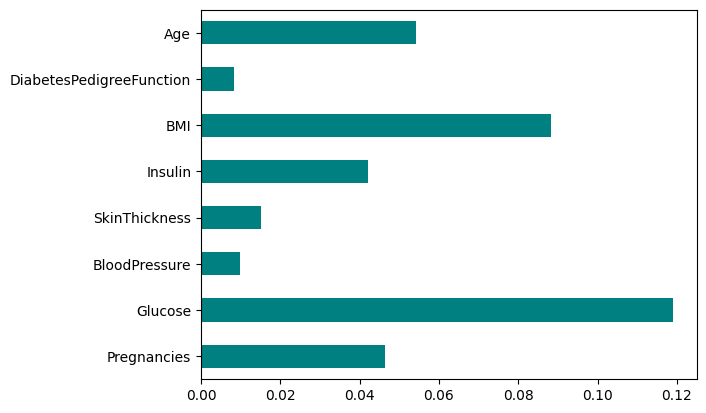

In [21]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

X = dataframe.drop(columns='Outcome', axis=1)
Y = dataframe['Outcome']

importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances, dataframe.columns [0:len(dataframe.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

Feature: Pregnancies
Number of outliers (IQR): 4
Feature: Glucose
Number of outliers (IQR): 0
Feature: BloodPressure
Number of outliers (IQR): 14
Feature: SkinThickness
Number of outliers (IQR): 35
Feature: Insulin
Number of outliers (IQR): 49
Feature: BMI
Number of outliers (IQR): 8
Feature: DiabetesPedigreeFunction
Number of outliers (IQR): 29
Feature: Age
Number of outliers (IQR): 9
Feature: Outcome
Number of outliers (IQR): 0


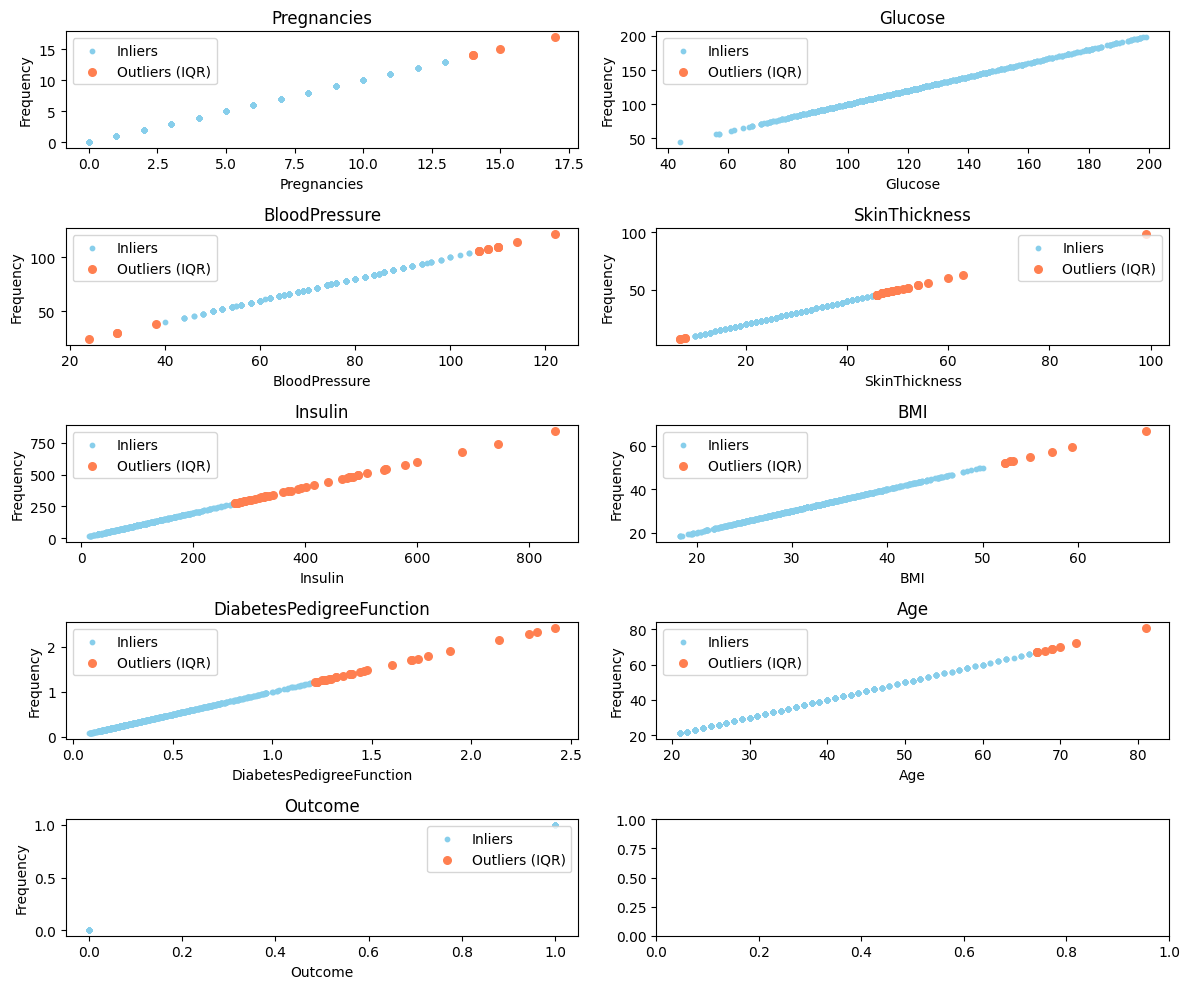

In [22]:
import math
# Define colors for inliers and outliers
inlier_color = 'skyblue'
outlier_color = 'coral'

# Analyze outliers and plot (adjusted for correct subplot access)

rows = int(math.ceil(len(features) / 2))  # Adjust rows for all features
cols = 2  # Adjust columns as needed
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))  # Create subplots according to rows and columns

for i, feature in enumerate(features):
  # IQR method for outlier detection
  q1 = dataframe[feature].quantile(0.25)
  q3 = dataframe[feature].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  # Separate inliers and outliers
  inliers = (dataframe[feature] >= lower_bound) & (dataframe[feature] <= upper_bound)
  outliers = ~inliers  # Invert boolean mask for outliers
  num_outliers = outliers.sum()

  print(f"Feature: {feature}")
  print(f"Number of outliers (IQR): {num_outliers}")
 

  # Reduce verbosity for clarity (optional)
  inlier_data = dataframe.loc[inliers, feature]
  outlier_data = dataframe.loc[outliers, feature]

  # Plot distribution with inliers and outliers highlighted
  current_ax = axes.flat[i]  # Access subplot using flattened index
  current_ax.scatter(dataframe.loc[inliers, feature], dataframe.loc[inliers, feature], color=inlier_color, s=10, label='Inliers')
  current_ax.scatter(dataframe.loc[outliers, feature], dataframe.loc[outliers, feature], color=outlier_color, s=30, label='Outliers (IQR)')

  # Customize plot
  current_ax.set_title(feature)
  current_ax.set_xlabel(feature)
  current_ax.set_ylabel('Frequency')
  current_ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [23]:
df_selected=dataframe.copy(deep=True)

# Handling Outliers


x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age', 'Outcome']
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


In [24]:
for i, feature in enumerate(features):
  # IQR method for outlier detection
  q1 = df_new[feature].quantile(0.25)
  q3 = df_new[feature].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  # Separate inliers and outliers
  inliers = (df_new[feature] >= lower_bound) & (df_new[feature] <= upper_bound)
  outliers = ~inliers  # Invert boolean mask for outliers
  num_outliers = outliers.sum()

  print(f"Feature: {feature}")
  print(f"Number of outliers (IQR): {num_outliers}")

Feature: Pregnancies
Number of outliers (IQR): 0
Feature: Glucose
Number of outliers (IQR): 0
Feature: BloodPressure
Number of outliers (IQR): 0
Feature: SkinThickness
Number of outliers (IQR): 0
Feature: Insulin
Number of outliers (IQR): 0
Feature: BMI
Number of outliers (IQR): 0
Feature: DiabetesPedigreeFunction
Number of outliers (IQR): 0
Feature: Age
Number of outliers (IQR): 0
Feature: Outcome
Number of outliers (IQR): 0


In [25]:
x = df_new.drop(columns='Outcome', axis=1)
y = df_new['Outcome']
x.head() # independent features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.747718,0.810300,0.516949,0.801825,0.256193,0.591265,0.750978,0.889831
1,0.232725,0.091265,0.290091,0.644720,0.256193,0.213168,0.475880,0.558670
2,0.863755,0.956975,0.233377,0.357888,0.256193,0.077575,0.782269,0.585398
3,0.232725,0.124511,0.290091,0.357888,0.662973,0.284224,0.106258,0.000000
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258


### Information Gain

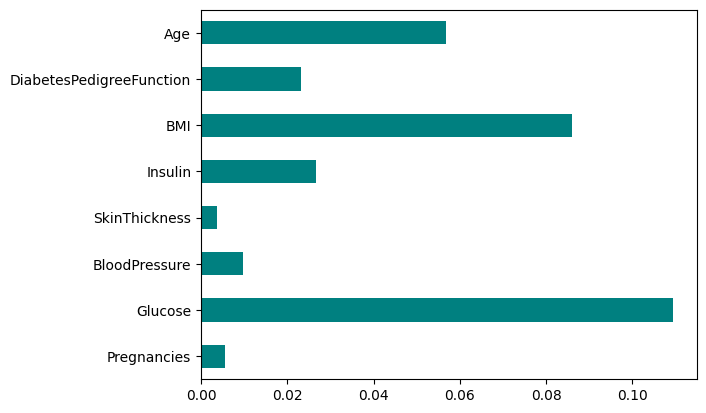

In [26]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

importances = mutual_info_classif(x, y)
feat_importances = pd.Series(importances, df_new.columns [0:len(df_new.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()


### correlation matrix

<Axes: >

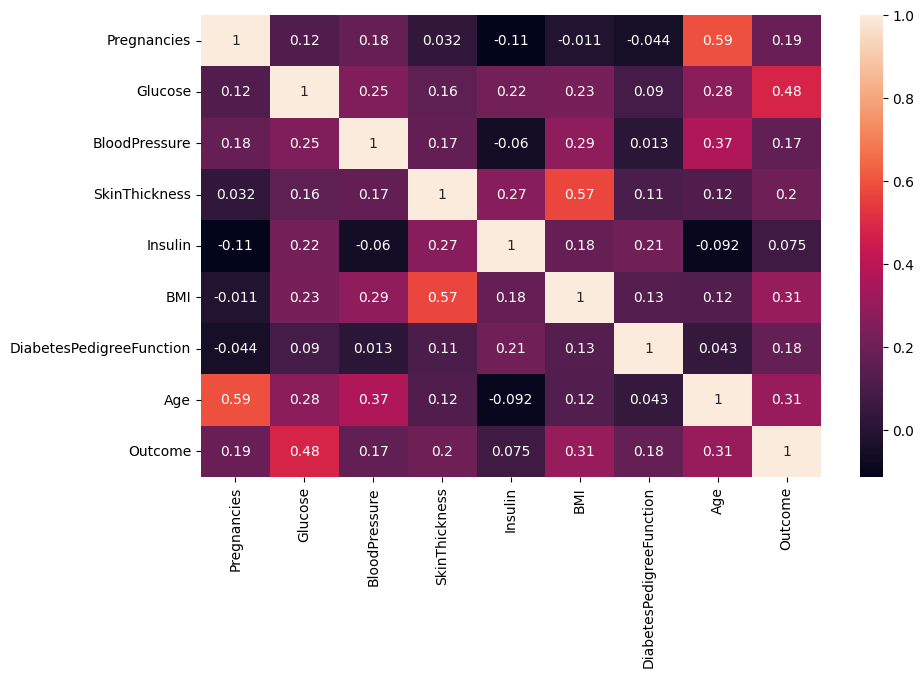

In [27]:
cor = df_new.corr()

# plotting Heatmap

plt.figure(figsize = (10,6))
sns.heatmap(cor,annot = True )

### with fetures random forest 

In [28]:
x = df_new.drop(columns=['Outcome','Pregnancies','SkinThickness'], axis=1)
y = df_new['Outcome']

In [29]:
# Train And Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=12)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,recall_score


random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred_dec = random.predict(X_test)

random_train = round(random.score(X_train, y_train) * 100, 2)
random_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)
random_recall = round(recall_score(y_test, y_pred_dec) * 100, 2)

print("Training Accuracy    :",random_train ,"%")
print("Model Accuracy Score :",random_accuracy ,"%")
print("Model Recall Score   :", random_recall, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dec))

Training Accuracy    : 100.0 %
Model Accuracy Score : 79.87 %
Model Recall Score   : 63.64 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        99
         1.0       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

--------------------------------------------------------

Confusion Matrix:
 [[88 11]
 [20 35]]


In [30]:
from sklearn.preprocessing import StandardScaler


# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
display(x_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=12)

# Train the Random Forest Classifier
random = RandomForestClassifier()
random.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred_dec = random.predict(X_test)
random_train = round(random.score(X_train, y_train) * 100, 2)
random_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :", random_train, "%")
print("Model Accuracy Score :", random_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dec))

array([[ 1.07329753,  0.05821441, -0.89697385,  0.31547925,  0.8681123 ,
         1.33615773],
       [-1.41442285, -0.72733625, -0.89697385, -0.99261159, -0.08365108,
         0.21042556],
       [ 1.58076543, -0.92372391, -0.89697385, -1.46172003,  0.97636975,
         0.3012819 ],
       ...,
       [ 0.17113239,  0.05821441,  0.77897743, -1.04222883, -0.84821929,
         0.11070519],
       [ 0.41471698, -1.26232334, -0.89697385, -0.3949494 , -0.09041717,
         1.25859744],
       [-1.13926248, -0.16977587, -0.89697385, -0.34984281, -0.27535697,
        -1.00837895]])

Training Accuracy    : 100.0 %
Model Accuracy Score : 79.22 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        99
         1.0       0.76      0.62      0.68        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154

--------------------------------------------------------

Confusion Matrix:
 [[88 11]
 [21 34]]


## with scaler Random forest

In [31]:

from sklearn.preprocessing import StandardScaler


# Standardize features (assuming x is your feature matrix)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Convert the scaled array to a DataFrame
df_scaled = pd.DataFrame(x_scaled, columns=X.columns)

display(df_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=12)

# Train the Random Forest Classifier
random = RandomForestClassifier()
random.fit(X_train, y_train)

# Make predictions and evaluate performance
y_pred_dec = random.predict(X_test)
random_train = round(random.score(X_train, y_train) * 100, 2)
random_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :", random_train, "%")
print("Model Accuracy Score :", random_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dec))

# Generating confusion matrix
conf_matrix = confusion_matrix(y_pred_dec,y_test)

# Plotting confusion matrix with title
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
X = df_new.drop(columns=['Outcome'], axis=1)
Y = df_new['Outcome']

In [ ]:
# Train And Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=12)

## Random Forest

Training Accuracy    : 100.0 %
Model Accuracy Score : 79.22 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84        99
         1.0       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

--------------------------------------------------------

Confusion Matrix:
 [[87 12]
 [20 35]]


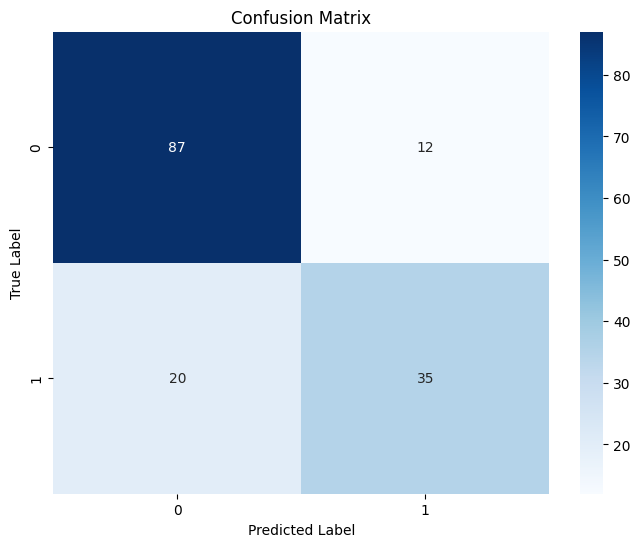

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred_ran = random.predict(X_test)

random_train = round(random.score(X_train, y_train) * 100, 2)
random_accuracy = round(accuracy_score(y_test,y_pred_ran) * 100, 2)

print("Training Accuracy    :",random_train ,"%")
print("Model Accuracy Score :",random_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_ran))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ran))
# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ran)

# Plotting confusion matrix with title
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##  LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(X_train, y_train)
y_pred_lr = logic.predict(X_test)

log_train = round(logic.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Training Accuracy    : 75.41 %
Model Accuracy Score : 78.57 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        99
         1.0       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

--------------------------------------------------------

Confusion Matrix:
 [[86 13]
 [20 35]]


## SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Training Accuracy    : 80.46 %
Model Accuracy Score : 78.57 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        99
         1.0       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154


Confusion Matrix:
 [[86 13]
 [20 35]]


## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dec))

Training Accuracy    : 100.0 %
Model Accuracy Score : 76.62 %
--------------------------------------------------------


Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        99
         1.0       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

--------------------------------------------------------

Confusion Matrix:
 [[81 18]
 [18 37]]


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Training Accuracy    : 84.85 %
Model Accuracy Score : 75.32 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        99
         1.0       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

--------------------------------------------------------

Confusion Matrix:
 [[80 19]
 [19 36]]


## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)
y_pred_proba_gb = gb_classifier.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate model performance
gb_accuracy = round(accuracy_score(y_test, y_pred_gb) * 100, 2)
print("Model Accuracy Score:", gb_accuracy, "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Model Accuracy Score: 75.97 %

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.84      0.82        99
         1.0       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154


Confusion Matrix:
 [[83 16]
 [21 34]]


## PCA

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA (adjust n_components as needed)
pca = PCA(n_components=3)  # Choose the number of principal components
pca_features = pca.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_features, Y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.6818181818181818


## Soft Voting

In [ ]:
# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=12)
gb_classifier = GradientBoostingClassifier(random_state=12)
lr_classifier = LogisticRegression(random_state=12)
svm_classifier = SVC(probability=True, random_state=12)

# Train classifiers
rf_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

# Predict probabilities for each classifier
rf_probs = rf_classifier.predict_proba(X_test)
gb_probs = gb_classifier.predict_proba(X_test)
lr_probs = lr_classifier.predict_proba(X_test)
svm_probs = svm_classifier.predict_proba(X_test)

# Weighted average of predicted probabilities
ensemble_probs = (rf_probs + gb_probs + lr_probs + svm_probs) / 4

# Convert probabilities to binary labels
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_preds)
print("Accuracy:", accuracy)

# Evaluate the model

print("\nClassification Report:\n", classification_report(y_test, ensemble_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ensemble_preds))



Accuracy: 0.6948051948051948

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.79      0.77        99
         1.0       0.58      0.53      0.55        55

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154


Confusion Matrix:
 [[78 21]
 [26 29]]


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_rad_lr_lin=VotingClassifier(estimators=[('random forest', random), ('Logistic Regression', logic),('decision tree',decision)], 
                       voting='soft', weights=[3,1,1]).fit(X_train,y_train)


print('The ensembled model with all the 3 classifiers is:',ensemble_rad_lr_lin.score(X_test,y_test))




The ensembled model with all the 3 classifiers is: 0.6753246753246753


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define specific parameters for each estimator
estimators = [
    ('lr', LogisticRegression()),  # Set C for LogisticRegression
    ('rf', RandomForestClassifier()),   # RandomForest has its own parameters
    ('ab', DecisionTreeClassifier())    # No parameters needed for DecisionTree
]

eclf = VotingClassifier(estimators=estimators, voting='soft')
params = {'lr__C': [10.0, 100.0]}  # Only parameters for LogisticRegression
Voting_Classifier_soft = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
Voting_Classifier_soft.fit(X_train, y_train)

y_pred = Voting_Classifier_soft.predict(X_test)

# y_pred = y_pred.reshape(-1, 1)
# y_test = y_test.reshape(-1,1)


acc_VC_soft = round(Voting_Classifier_soft.score(X_train, y_train) * 100, 2)
# acc_test_VC_soft = round(Voting_Classifier_soft.score(y_pred, y_test) * 100, 2)
acc_test_VC_soft = round(Voting_Classifier_soft.score(X_test, y_test) * 100, 2)

print("Training Accuracy    :",acc_VC_soft ,"%")
print("Model Accuracy Score :",acc_test_VC_soft ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Accuracy    : 100.0 %
Model Accuracy Score : 78.57 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83        99
         1.0       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154

--------------------------------------------------------

Confusion Matrix:
 [[83 16]
 [17 38]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define specific parameters for each estimator
estimators = [
    ('lr', logic),  # Set C for LogisticRegression
    ('rf', random),   # RandomForest has its own parameters
    ('ab', decision)    # No parameters needed for DecisionTree
]

eclf = VotingClassifier(estimators=estimators, voting='soft')
params = {'lr__C': [10.0, 100.0]}  # Only parameters for LogisticRegression
Voting_Classifier_soft = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
Voting_Classifier_soft.fit(X_train, y_train)




acc_VC_soft = round(Voting_Classifier_soft.score(X_train, y_train) * 100, 2)
acc_test_VC_soft = round(Voting_Classifier_soft.score(X_test, y_test) * 100, 2)

print("Training Accuracy    :",acc_VC_soft ,"%")
print("Model Accuracy Score :",acc_test_VC_soft ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Accuracy    : 100.0 %
Model Accuracy Score : 79.22 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83        99
         1.0       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154

--------------------------------------------------------

Confusion Matrix:
 [[83 16]
 [17 38]]


## Comparing Different Models

In [ ]:
# Create a variable 
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Decission Tree', 'Random Forest'],
                       'Training Accuracy':[svc_train,knn_train,log_train,decision_train, random_train],
                       'Model Accuracy':[svc_accuracy,knn_accuracy,log_accuracy,decision_accuracy, random_accuracy]})

models.sort_values(by='Model Accuracy', ascending=False).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'color': 'LigntGreen',
            'font-size': '15px'
        })


,Model,Training Accuracy,Model Accuracy
4,Random Forest,100.000000,80.520000
0,Support Vector Machines,80.460000,78.570000
2,Logistic Regression,75.410000,78.570000
3,Decission Tree,100.000000,77.920000
1,KNN,84.850000,75.320000


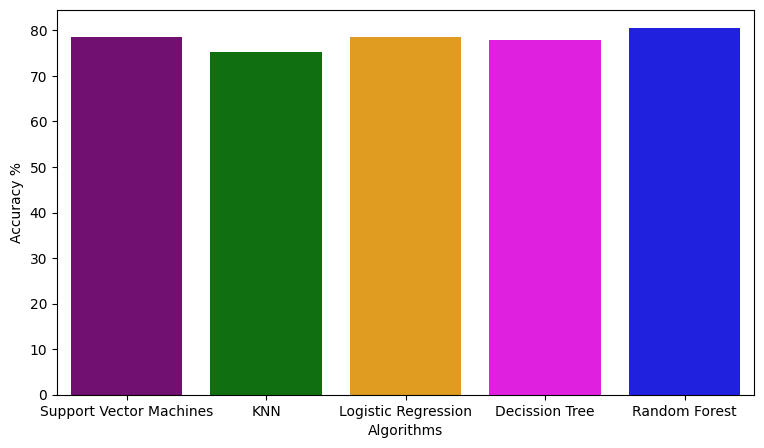

In [ ]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

plt.figure(figsize=(9,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Model Accuracy'], palette=colors )
plt.show()

## FINAL PREDICTIONS

In [ ]:
# Make predictions on unseen data, here i have given random values for each features in the input_data
# take the data  and store in the variable 
input_data = (2,80,90,40,150,24,0.727000,20)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data) # converting this list into numpy array

# reshape the numpy array as we are predicting for one instance

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

[[  2.     80.     90.     40.    150.     24.      0.727  20.   ]]


In [ ]:
# predict
predictions = logic.predict(input_data_reshaped)
print(predictions)
if predictions[0] == 1:
    print("The patient is predicted to have diabetes.")
else:
    print("The patient is predicted to not have diabetes.")

[1.]
The patient is predicted to have diabetes.
